# Imports + Setup

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.figsize':(11,7), 
    'figure.dpi':120
})
image_dest = 'results_images/'
visual_specs={'fontsize':14, 'palette':'Greys', 'saturation':0.5}
fontsize = visual_specs['fontsize']
palette = visual_specs['palette']
datapath = '../Data/'

id_col = 'SPA_PER_ID'
event_col = 'CMIS_MATCH'

# Load Predictions

In [11]:
def load_model_output(filepath: str):
    infile = open(filepath, 'rb')
    model_output = pickle.load(infile)
    infile.close()
    return model_output['Performance'], model_output['Models'], model_output['Features']

def print_list(list_to_print: list):
    for item in list_to_print:
        print(item)
    print()
    return

In [13]:
"""filename = 'output_original.pickle'
summary1, models1, features1 = load_model_output(datapath+filename)
print('Original Features')
print_list(features1)

filename = 'output_cur_balance.pickle'
summary2, models2, features2 = load_model_output(datapath+filename)
print('Current Balance Features')
print_list(features2)"""

filename = 'output_reduced.pickle'
summary3, models3, features3 = load_model_output(datapath+filename)
print('Reduced Features')
print_list(features3)

"""filename = 'output_bill.pickle'
summary4, models4, features4 = load_model_output(datapath+filename)
print('Bill Features')
print_list(features4)"""

Original Features
PAST_DUE
TOTAL_60_DAYS_AMT
NUM_PREM_FOR_PER
BREAK_ARRANGEMENT
MULTI_DWELL_SIZE
SNAP_GEO
NUM_PER_FOR_PREM
HAS_COTENANT
PER-PREM-MONTH_ID
CMIS_MATCH

Current Balance Features
PAST_DUE
TOTAL_CUR_BALANCE
NUM_PREM_FOR_PER
BREAK_ARRANGEMENT
MULTI_DWELL_SIZE
SNAP_GEO
NUM_PER_FOR_PREM
HAS_COTENANT
PER-PREM-MONTH_ID
CMIS_MATCH

Reduced Features
PAST_DUE
TOTAL_CUR_BALANCE
NUM_PREM_FOR_PER
BREAK_ARRANGEMENT
NUM_PER_FOR_PREM
PER-PREM-MONTH_ID
CMIS_MATCH

Bill Features
TOTAL_CUR_BALANCE
PER-PREM-MONTH_ID
CMIS_MATCH



# ROC Curve

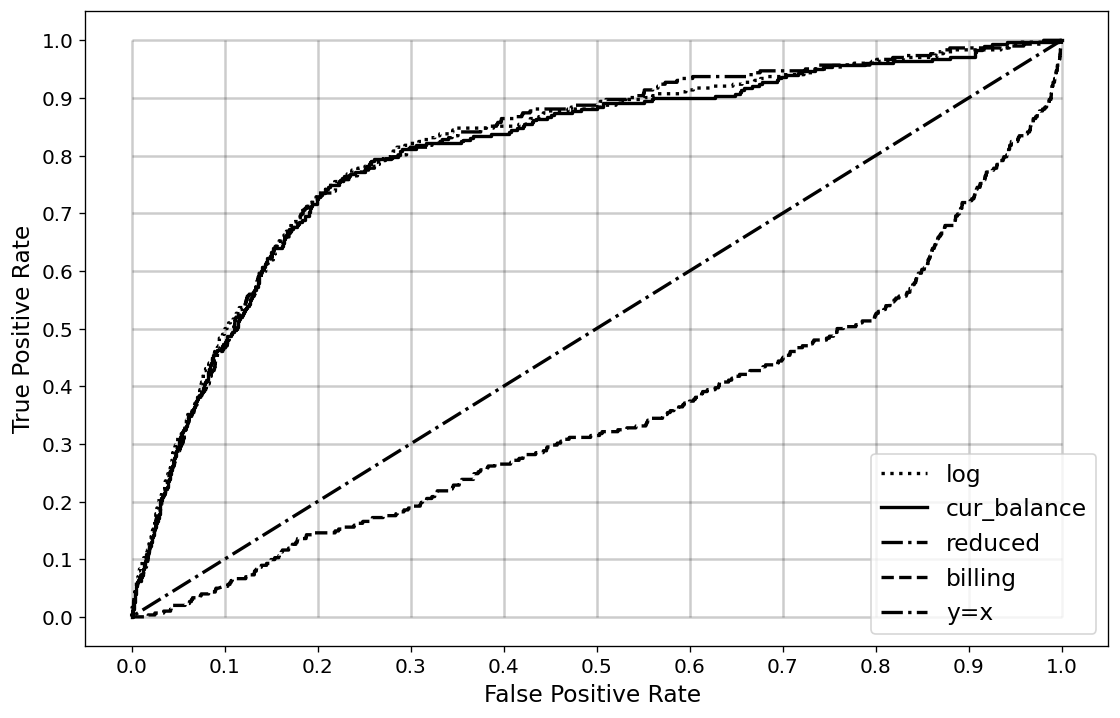

In [15]:
linewidth = 2
color = 'black'
alpha=0.2

# Original
# plt.plot(summary1['fpr'], summary1['tpr'], color='black', label='log', linestyle='dotted', linewidth=linewidth)

# 'TOTAL_CUR_BALANCE' instead of 'TOTAL_60_DAYS_AMT'
# plt.plot(summary2['fpr'], summary2['tpr'], color='black', label='cur_balance', linestyle='-', linewidth=linewidth)

# Reduced to only ubiquituous features.
plt.plot(summary3['fpr'], summary3['tpr'], color='black', label='reduced', linestyle='-.', linewidth=linewidth)

# Only billing
# plt.plot(summary4['fpr'], summary4['tpr'], color='black', label='billing', linestyle='--', linewidth=linewidth)


# Refernce line
plt.plot([1, 0], [1, 0], color='black', label='y=x', linestyle='dashdot', linewidth=linewidth)

ticks = np.arange(0, 1.1, 0.1)
plt.hlines(y=ticks, xmin=0, xmax=1, colors=color, alpha=alpha)
plt.vlines(x=ticks, ymin=0, ymax=1, colors=color, alpha=alpha)
plt.xlabel('False Positive Rate ', fontsize=fontsize)
plt.xticks(ticks, fontsize=fontsize-2)
plt.ylabel('True Positive Rate', fontsize=fontsize)
plt.yticks(ticks, fontsize=fontsize-2)
plt.legend(fontsize=fontsize)
# plt.savefig(fname=image_dest+'ROC_feature_compare.png', bbox_inches='tight')
plt.show()

# Analyze Models

In [7]:
features_to_drop = ['PER-PREM-MONTH_ID', 'CMIS_MATCH']

In [9]:
models3[0].summary(yname='CMIS_MATCH', xname=[x for x in features3 if x not in features_to_drop])

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             CMIS_MATCH   No. Observations:              2423288
Model:                          Logit   Df Residuals:                  2423283
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                 0.05946
Time:                        09:13:25   Log-Likelihood:                -41350.
converged:                       True   LL-Null:                       -43964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
PAST_DUE              0.3101      0.004     78.079      0.000       0.302       0.318
TOTAL_CUR_BALANCE     0.0002    9.4e-06     22.073      0.000       0.000       0.000
NUM_PREM_FOR_PER     -6.2334      0.036   -175.415      0.000      -6.303      -6.164
BREAK_ARRANGEMENT     0.5253      0.049     10.775      0.000       0.430       0.621
NUM_PER_FOR_PREM     -0.1459      0.028     -5.298      0.000      -0.200      -0.092
=====================================================================================
"""

# Analyze Performance

In [14]:
summary3

,threshold,fpr,tpr,tp,fp,tn,fn,tnr,balanced,ppv,npv,f-1,accuracy,auc
0,1.938885,0.000000,0.000000,0.0,0.0,84043.0,302.0,1.000000,0.500000,0.000000,1.000000,NaN,0.996419,0.813853
1,0.938885,0.000012,0.000000,0.0,1.0,84042.0,302.0,0.999988,0.499994,0.000000,0.999988,NaN,0.996408,0.813853
2,0.089653,0.000738,0.000000,0.0,62.0,83981.0,302.0,0.999262,0.499631,0.000000,0.999262,NaN,0.995684,0.813853
3,0.089585,0.000738,0.003311,1.0,62.0,83981.0,301.0,0.999262,0.501287,0.003311,0.999262,0.003311,0.995696,0.813853
4,0.080485,0.001095,0.003311,1.0,92.0,83951.0,301.0,0.998905,0.501108,0.003311,0.998905,0.003311,0.995341,0.813853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086,0.001106,0.997263,1.000000,302.0,83813.0,230.0,0.0,0.002737,0.501368,1.000000,0.002737,1.000000,0.006307,0.813853
10087,0.001106,0.997287,1.000000,302.0,83815.0,228.0,0.0,0.002713,0.501356,1.000000,0.002713,1.000000,0.006284,0.813853
10088,0.000973,0.999298,1.000000,302.0,83984.0,59.0,0.0,0.000702,0.500351,1.000000,0.000702,1.000000,0.004280,0.813853
10089,0.000972,0.999322,1.000000,302.0,83986.0,57.0,0.0,0.000678,0.500339,1.000000,0.000678,1.000000,0.004256,0.813853
